# New Section

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,UpSampling2D
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
(x_train, _), (x_test, _) = mnist.load_data()

In [5]:
x_train.dtype

dtype('uint8')

In [6]:
x_train=x_train/255
x_test=x_test/255

In [7]:
x_train.dtype

dtype('float64')

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train_reshape=np.reshape(a=x_train,newshape=(60000, 28, 28,1))
x_test_reshape=np.reshape(a=x_test,newshape=(10000, 28, 28,1))

In [11]:
x_train_reshape.shape

(60000, 28, 28, 1)

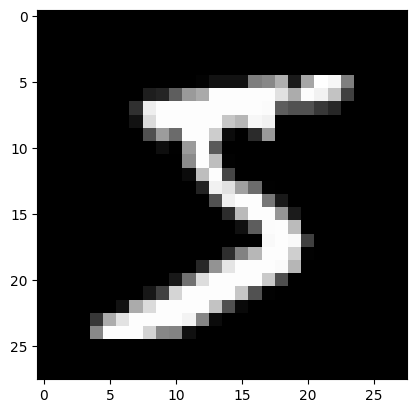

In [12]:
plt.imshow(x_train_reshape[0],cmap='gray')

In [14]:
x_train_noisy=x_train_reshape + 0.2 * np.random.normal(loc=0.0, scale=1.0,size=(60000,28,28,1))
x_test_noisy=x_test_reshape + 0.2 * np.random.normal(loc=0.0, scale=1.0,size=(10000,28,28,1))

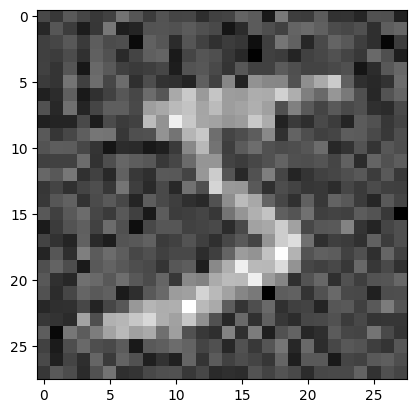

In [15]:
plt.imshow(x_train_noisy[0],cmap='gray')

In [16]:
x_train_clipped=np.clip(a=x_train_noisy, a_min=0, a_max=2)
x_test_clipped=np.clip(a=x_test_noisy, a_min=0, a_max=2)

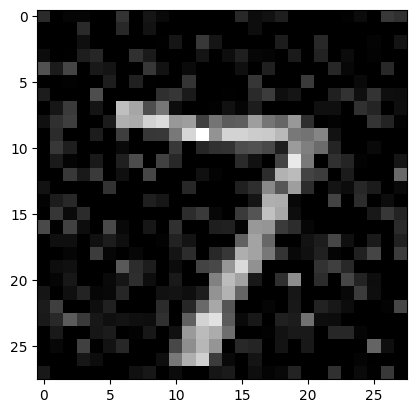

In [17]:
plt.imshow(x_test_clipped[0],cmap='gray')

In [15]:
model=Sequential()


model.add(Conv2D(input_shape=(28,28,1),filters=32, kernel_size=(3,3), strides=(1, 1), padding='same',activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(filters=8, kernel_size=(3,3), strides=(1, 1), padding='same',activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(filters=8, kernel_size=(3,3), strides=(1, 1), padding='same',activation="relu"))
model.add(MaxPooling2D(padding="same"))





model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 8)           0

In [19]:
model=Sequential()


model.add(Conv2D(input_shape=(28,28,1),filters=32, kernel_size=(3,3), strides=(1, 1), padding='same',activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(filters=8, kernel_size=(3,3), strides=(1, 1), padding='same',activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(filters=8, kernel_size=(3,3), strides=(1, 1), padding='same',activation="relu"))
model.add(MaxPooling2D(padding="same"))

###################################################################################################

model.add(Conv2D(filters=8, kernel_size=(3,3), strides=(1, 1), padding='same',activation="relu"))
model.add(UpSampling2D(size=(2,2)))

model.add(Conv2D(filters=8, kernel_size=(3,3), strides=(1, 1), padding='same',activation="relu"))
model.add(UpSampling2D(size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1),activation="relu"))
model.add(UpSampling2D(size=(2,2)))

model.add(Conv2D(filters=1, kernel_size=(3,3), strides=(1, 1), padding='same',activation="relu"))







model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 8)           0

In [20]:
model.compile(optimizer='rmsprop', loss="mean_squared_error")

In [21]:
model.fit(x=x_train_clipped,y=x_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 5ms/step - loss: 0.0347
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0223
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0191
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0174
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0162
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0153
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0147
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0142
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0138
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0135


In [22]:
pred_1=model.predict(x_test_clipped)

313/313 [==============================] - 1s 3ms/step


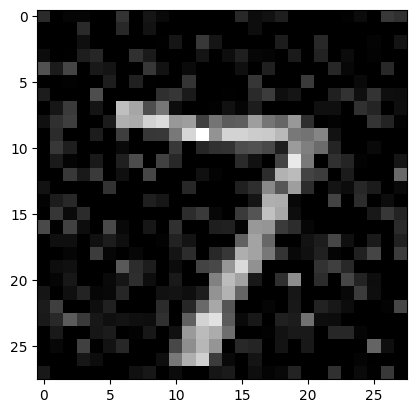

In [23]:
plt.imshow(x_test_clipped[0],cmap='gray')

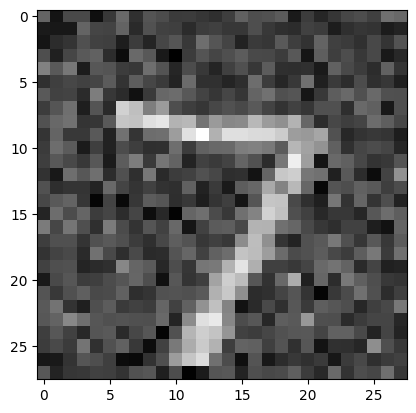

In [24]:
plt.imshow(x_test_noisy[0],cmap='gray')

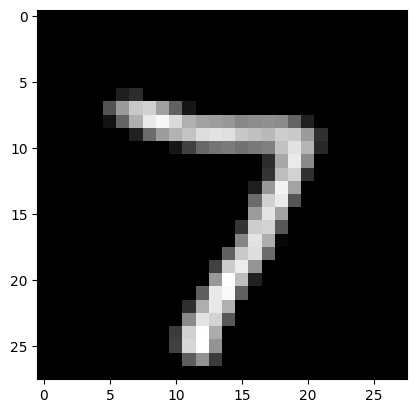

In [25]:
plt.imshow(pred_1[0],cmap='gray')

In [ ]:
pred_2=model.predict(x_test_noisy)

313/313 [==============================] - 1s 2ms/step


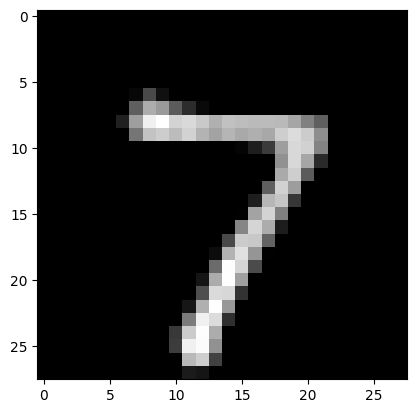

In [ ]:
plt.imshow(pred_2[0],cmap='gray')